In [237]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##  **Data Loading and Exploratory Data Analysis (EDA)**
To begin our NLP project, we first loaded the dataset which contains humanitarian assessment reports, each associated with a severity label. Our aim is to predict the severity of humanitarian issues based on the textual content of these reports.

**Key Steps in Data Loading:**
Loaded the dataset using Pandas.

Displayed basic information: column names, data types, and sample records.

Verified the presence of essential columns for NLP and modeling:

excerpt: the main text field describing events.

severity: the target label, with categories like "Unsafe", "Safe" and "Moderate".

Checked for null or missing values in the key columns.

In [238]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [239]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\USER\Documents\Flatiron\Capstone Project\CleanWatAI\data\processed\water_sanitation.csv')

In [240]:
df.shape

(4157, 29)

In [241]:
df.head()

,entry_id,country,source_title,excerpt,geo_location,water_source,sanitation_type,sector,gender,age_group,...,water_color,water_clarity,water_odor,recent_rain,nearby_activities,nearby_infrastructure,vegetation_near_source,waste_disposal_nearby,animal_access,water_flow_rate
0,81a69ab1-6070-4643-ab31-062dabbe355d,Haiti,Skill may certainly off sing.,Health inspectors on site found that improper ...,5.937200,River,Open Defecation,Health,Female,Youth,...,clear,clear,chemical,no,farming,waste facilities,lush,managed sites,no,slow
1,e4774c0e-38ca-48bc-a62d-56ad7dc2ebf1,Ethiopia,Cup movie than fund artist.,The latest sanitation review indicated that im...,34.615215,Borehole,Composting Toilet,Public Infrastructure,Male,Youth,...,murky,turbid,sewage,yes,farming,waste facilities,sparse,none,yes,stagnant
2,ed103eee-2e27-4be4-b6fe-59e1b095a507,Nepal,Note Congress day million everybody environmen...,"According to recent field observations, waste ...",-68.387244,Truck Delivery,Pit Latrine,Health,Female,Adult,...,green,clear,sewage,no,mining,waste facilities,dead,managed sites,yes,flowing
3,4d8e529d-08cd-428b-b4a8-e4c4cbadeb33,India,Summer today southern.,The latest sanitation review indicated that ef...,-71.814776,Rainwater,Composting Toilet,Education,Male,Elderly,...,brown,turbid,sewage,no,mining,sewage lines,dead,managed sites,yes,slow
4,8396148f-36a8-4ee9-af7f-653b8d06aa9c,Kenya,Region sea nation fast shake born.,A comprehensive report issued by the agency no...,-10.132914,Borehole,Composting Toilet,Public Infrastructure,Female,Youth,...,murky,cloudy,none,no,none,waste facilities,lush,open dumping,no,stagnant


In [242]:
# Dropping the 'entry_id' column
df.drop('entry_id', axis=1, inplace=True)

In [243]:
df.columns

Index(['country', 'source_title', 'excerpt', 'geo_location', 'water_source',
       'sanitation_type', 'sector', 'gender', 'age_group', 'income_level',
       'infrastructure_type', 'population_density', 'climate_zone', 'year',
       'organization', 'source_type', 'special_needs_group', 'severity',
       'water_color', 'water_clarity', 'water_odor', 'recent_rain',
       'nearby_activities', 'nearby_infrastructure', 'vegetation_near_source',
       'waste_disposal_nearby', 'animal_access', 'water_flow_rate'],
      dtype='object')

In [244]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [245]:
# Checking Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


special_needs_group    779
dtype: int64

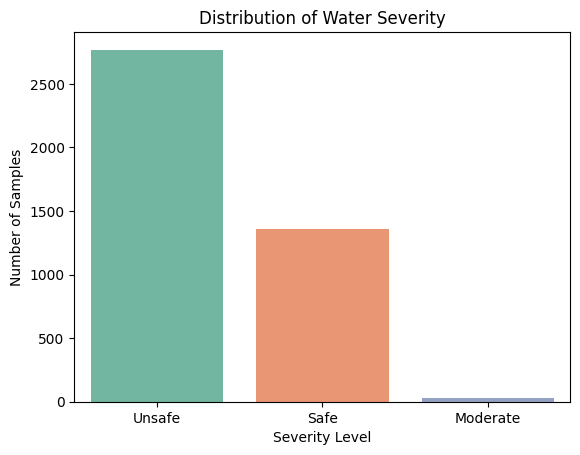

In [246]:
# Target variable distribution
# Count of each severity class
sns.countplot(data=df, x='severity', hue='severity', palette='Set2', legend=False)
plt.title('Distribution of Water Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Samples')
plt.show()


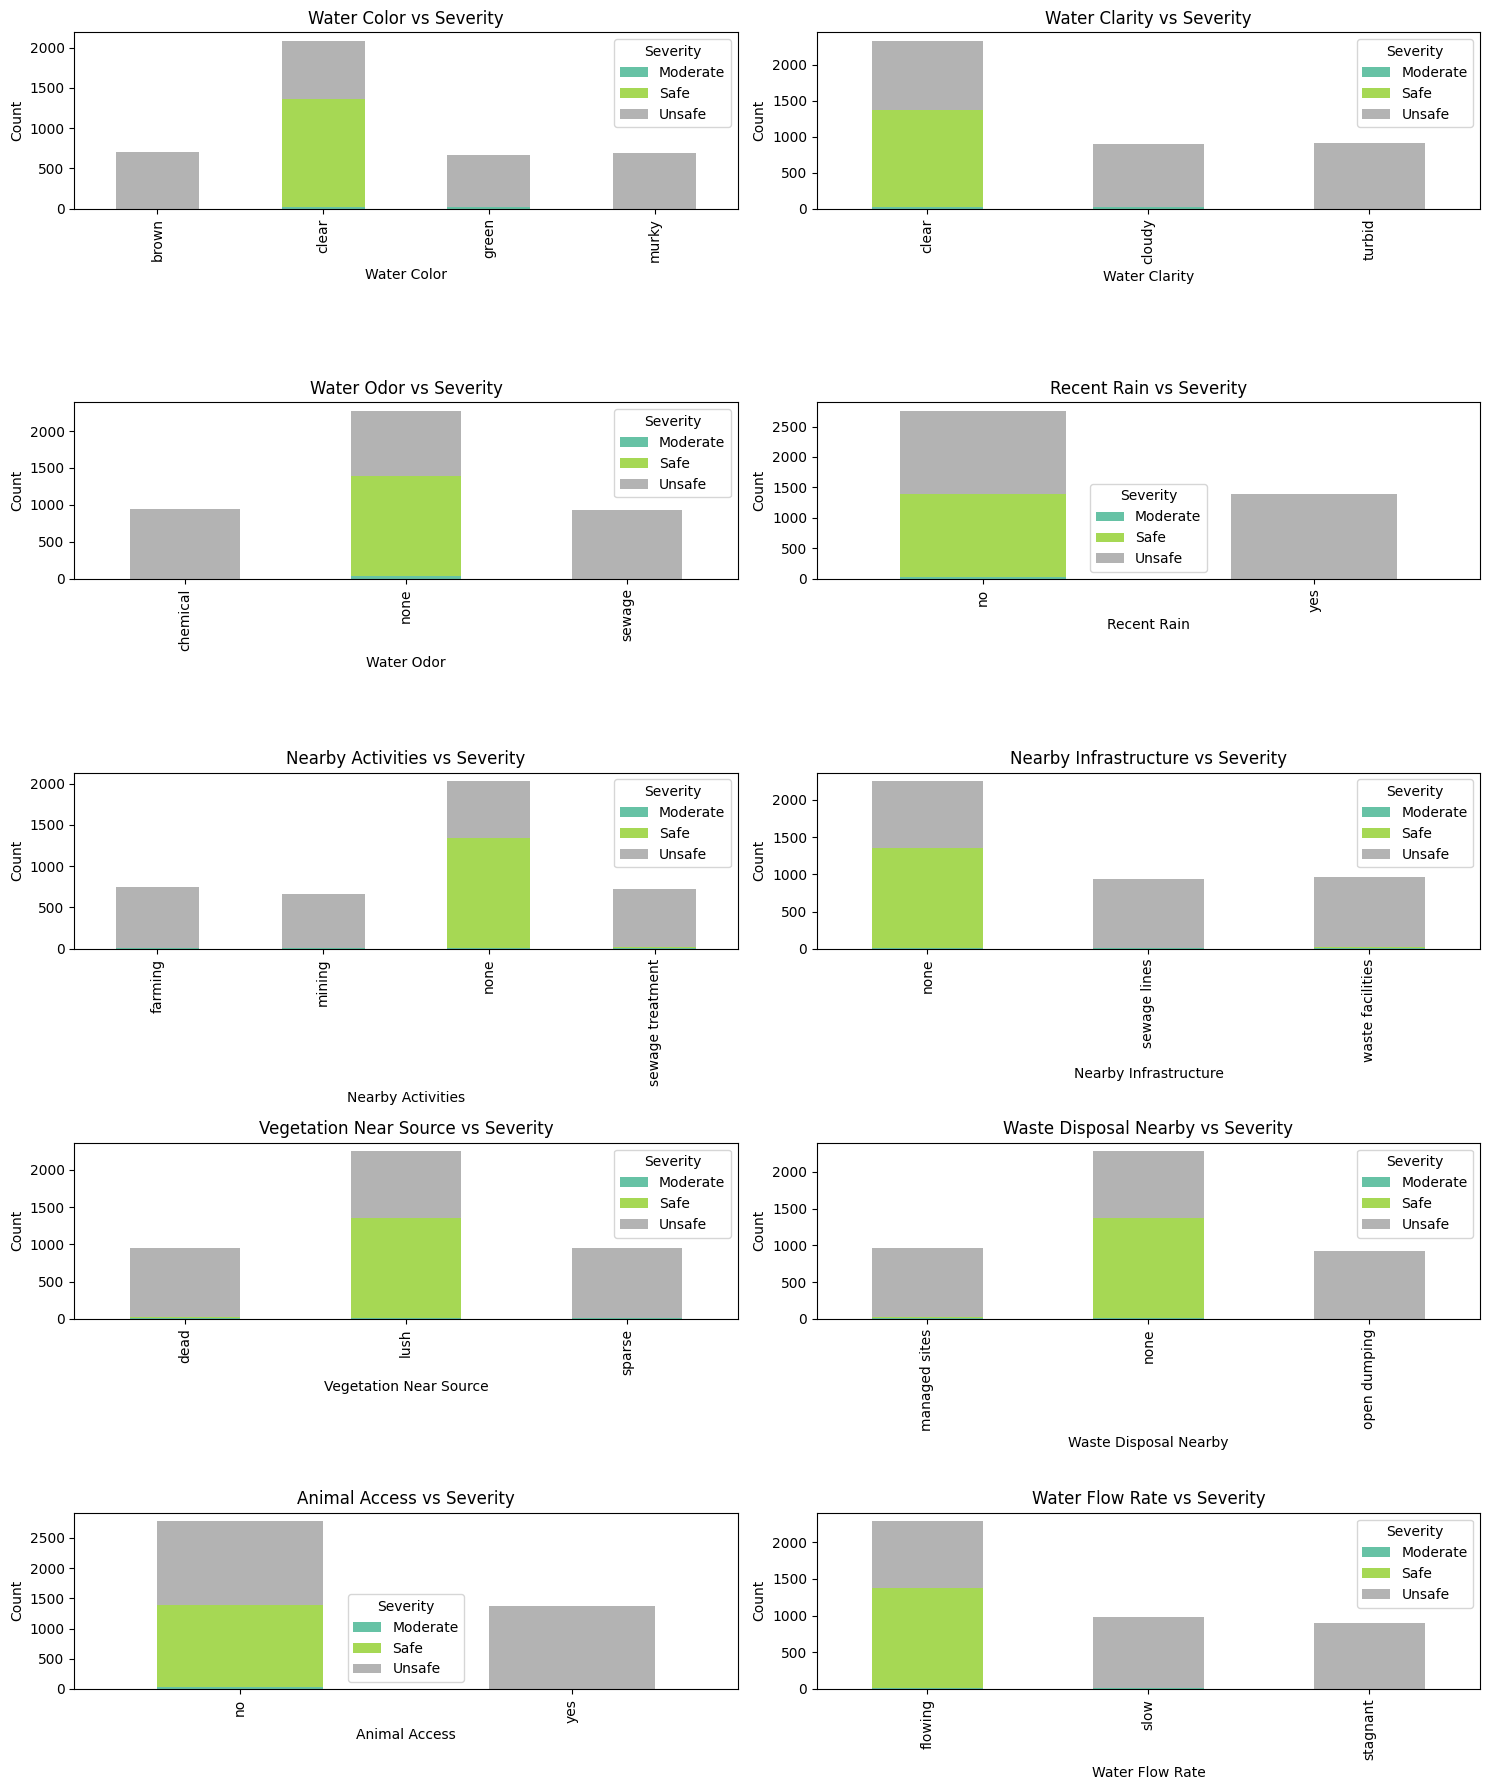

In [247]:
# Select categorical water quality features
features_to_plot = [
    'water_color', 'water_clarity', 'water_odor', 'recent_rain',
    'nearby_activities', 'nearby_infrastructure', 'vegetation_near_source',
    'waste_disposal_nearby', 'animal_access', 'water_flow_rate'
]

# Set up subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Plot count plots for each feature colored by severity
for i, feature in enumerate(features_to_plot):
    # Group by feature and severity, count occurrences
    df_grouped = df.groupby([feature, 'severity']).size().unstack(fill_value=0)

    # Plot stacked bar chart
    df_grouped.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Severity')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Severity')

# Adjust layout
plt.tight_layout()


In [248]:
df.describe(include='all')

,country,source_title,excerpt,geo_location,water_source,sanitation_type,sector,gender,age_group,income_level,...,water_color,water_clarity,water_odor,recent_rain,nearby_activities,nearby_infrastructure,vegetation_near_source,waste_disposal_nearby,animal_access,water_flow_rate
count,4157,4157,4157,4157.000000,4157,4157,4157,4157,4157,4157,...,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157
unique,10,3000,321,NaN,7,4,4,2,4,3,...,4,3,3,2,4,3,3,3,2,3
top,Bangladesh,Body form table behavior receive.,Health inspectors on site found that waste man...,NaN,Truck Delivery,Flush Toilet,Health,Female,Child,High,...,clear,clear,none,no,none,none,lush,none,no,flowing
freq,463,15,47,NaN,630,1151,1111,2110,1093,1448,...,2088,2337,2274,2758,2033,2253,2252,2282,2778,2285
mean,NaN,NaN,NaN,0.565662,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,52.938411,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-89.945994,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,-45.052073,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.330083,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,47.172705,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Cleaning and Preprocessing**
Handle Missing Values: Drop or fill missing values using mean, mode, or a placeholder (e.g., "Unknown").

Encode Categorical Features: Use Label Encoding or One-Hot Encoding to convert categories to numbers.

Feature Engineering: Create or combine features that may help the model (e.g., weather + activity).

Scaling: Normalize numeric values using StandardScaler or MinMaxScaler.

Text Preprocessing: Clean, tokenize, remove stopwords, and lemmatize if working with text.

Split Data: Divide into training, validation, and test sets (e.g., 70/15/15).

In [249]:
print(df.shape)

(4157, 28)


In [250]:
# Finding any NaN values
df.isna().any()

country                   False
source_title              False
excerpt                   False
geo_location              False
water_source              False
sanitation_type           False
sector                    False
gender                    False
age_group                 False
income_level              False
infrastructure_type       False
population_density        False
climate_zone              False
year                      False
organization              False
source_type               False
special_needs_group        True
severity                  False
water_color               False
water_clarity             False
water_odor                False
recent_rain               False
nearby_activities         False
nearby_infrastructure     False
vegetation_near_source    False
waste_disposal_nearby     False
animal_access             False
water_flow_rate           False
dtype: bool

In [251]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(3378, 28)


In [252]:
df_copy = df.copy()

In [253]:
df_copy.reset_index(inplace=True)

In [254]:
# Get all object (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if 'excerpt' in categorical_cols:
    categorical_cols.remove('excerpt')


In [255]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Columns to exclude from label encoding for separate NLP pipeline
text_columns_to_exclude = [
    'excerpt', 'source_title', 'geo_location',
    'nearby_activities', 'organization',
    'vegetation_near_source', 'waste_disposal_nearby'
]

# Select categorical columns and exclude NLP-relevant ones
categorical_cols = df.select_dtypes(include='object').drop(
    columns=text_columns_to_exclude, errors='ignore'
).columns

# Initialize label encoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [256]:
# Text Preprocessing for 'excerpt'
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['excerpt_clean'] = df['excerpt'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [257]:
# Feature Scaling for numerical data
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include='number').columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### **Feature Engineering**

In [258]:
# Population Density Log Transform handles skewness
df['population_log'] = np.log1p(df['population_density'])

# simple binary feature
df['has_rain'] = df['recent_rain'].map({'Yes': 1, 'No': 0})
df['waste_nearby'] = df['waste_disposal_nearby'].map({'Yes': 1, 'No': 0, 'Unknown': 0})

# Interactional feature Animal access and water clarity combines the risk indicator
df['animal_clarity_interact'] = df['animal_access'] * df['water_clarity']

# Year as age of the record if static data
df['record_age'] = 2025 - df['year']

# Climate-based risk factor
df['climate_zone_encoded'] = le.fit_transform(df['climate_zone'].astype(str))


c:\Users\USER\anaconda3\envs\cleanwaterai_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



In [259]:
# Count encoding of common categorical values
high_card_cols = ['organization', 'source_type']
for col in high_card_cols:
    if col in df.columns:
        df[col + '_freq'] = df[col].map(df[col].value_counts())

# Drop any duplicates created by derived versions
df = df.drop_duplicates()

In [260]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop('severity', axis=1)
y = df['severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
